# Load libraries for part 1

In [1]:
import pandas as pd
#read csv files
articles = pd.read_csv('articleinfo.csv')
authors = pd.read_csv('authorinfo.csv')

# Combine Based on Article 

In [2]:
master_df = articles.merge(authors, left_on='Article No.', right_on = 'Article No.',
                          how = 'outer')

# Fill in Null Cells and Correct Data

In [3]:
master_df = master_df.fillna('0')

#find incorrectly spelt countries
print("Messy Countries")
print(sorted(master_df['Country'].unique()))
print()

# Chian
# Chile (with space)
# Denarmk
# Spain (with space)

col = master_df.columns.get_loc('Country')
for index, row in master_df.iterrows():
    if(row['Country'] == 'Chian'):
        master_df.at[index, 'Country'] = 'China'
    elif(row['Country'] == 'Chile '):
        master_df.at[index, 'Country'] = 'Chile' 
    elif(row['Country'] == 'Denamrk'):
        master_df.at[index, 'Country'] = 'Denmark ' 
    elif(row['Country'] == 'Spain '):
        master_df.at[index, 'Country'] = 'Spain' 
        
print("Fixed Countries")
print(sorted(master_df['Country'].unique()))



Messy Countries
['0', 'Australia', 'Bristol', 'Canada', 'Chian', 'Chile', 'Chile ', 'China', 'Cyprus', 'Czech Republic', 'Denamrk', 'Denmark ', 'France', 'Germany', 'Greece', 'Hong Kong', 'India', 'Ireland', 'Israel ', 'Italy', 'Korea', 'Kyrgyzstan', 'Liechtenstein', 'Malaysia', 'Mexico', 'New Zealand', 'Norway', 'Pakistan', 'Palestine', 'Russia', 'Slovakia', 'South Africa', 'Spain', 'Spain ', 'Switzerland', 'Taiwan', 'USA', 'Ukraine', 'United Arab Emirates', 'United Kingdom']

Fixed Countries
['0', 'Australia', 'Bristol', 'Canada', 'Chile', 'China', 'Cyprus', 'Czech Republic', 'Denmark ', 'France', 'Germany', 'Greece', 'Hong Kong', 'India', 'Ireland', 'Israel ', 'Italy', 'Korea', 'Kyrgyzstan', 'Liechtenstein', 'Malaysia', 'Mexico', 'New Zealand', 'Norway', 'Pakistan', 'Palestine', 'Russia', 'Slovakia', 'South Africa', 'Spain', 'Switzerland', 'Taiwan', 'USA', 'Ukraine', 'United Arab Emirates', 'United Kingdom']


# 1.1 Year vs. Number of Articles

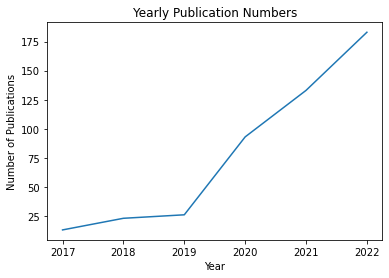

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#year vs number of articles posted that year
year_df = master_df.groupby('Year').count()
plt.plot(year_df['Article No.'])
plt.title('Yearly Publication Numbers')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

# 1.2 Yearly vs. Number pf Citations

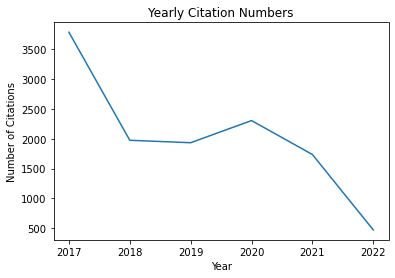

In [5]:
#year vs number of citations posted that year
master_df['Citation'] = master_df['Citation'].astype('float') #must convert citations to floats so not read as a string
citation_df = master_df.groupby('Year').sum(numeric_only=True) #sum the numbers
plt.plot(citation_df['Citation'])
plt.title('Yearly Citation Numbers')
plt.xlabel('Year')
plt.ylabel('Number of Citations')
plt.show()

# 1.3 Publications Across Countries

In [6]:
import pygal

worldmap_chart = pygal.maps.world.World()

country_df = master_df.groupby('Country').count().sort_values('Title')
worldmap_chart.title = 'Publications Per Country'
worldmap_chart.add('Under 10', {
    'il': 1,
    'ps': 1,
    #Bristol is not covered by pygal
    'kg': 1,
    'ae': 1,
    'no': 2,
    'li': 2,
    'mx': 3,
    'in': 3,
    'kr': 3,
    'gr': 5,
    'ru': 5,
    'ch': 5,
    'my': 6,
    'pk': 6,
    'ua': 6,
    'nz': 6,
    'sk': 7,
    'cy': 7,
    'fr': 7,
    'hk': 8,
    'cl': 9
})
worldmap_chart.add('Under 20',{
    'ca': 12,
    'au': 13,
    'tw': 13,
    'dk': 13,
    'cz': 15,
    'ie': 17,
    'za': 17,
    'it': 19,
    'es': 19
})
worldmap_chart.add('Under 30',{
    'de': 26,
    'gb': 26
})
worldmap_chart.add('Under 40',{
    'cn': 35
})
worldmap_chart.add('Under 70',{
    'us': 62
})
worldmap_chart.render_to_file('map.svg')
#user must open svg file on their computer to view

# 1.4 Top Five Institutions

In [7]:
institution_df = master_df.groupby('Author Affiliation').count().sort_values('Article No.', ascending=False)
print("Top 5 Institutions")
temp = institution_df.head(6) #get top 6, including 0 which represents NA
listTemp = temp.index.to_list() #get row names representing institutions

for x in range(1,6): #start at 1 to skip Non applicablle 
    print(str(listTemp[x]) + ' ' + str(temp.iloc[x,1]))

Top 5 Institutions
University of the Western Cape 17
Masaryk University 12
University College Cork 11
Intel Corporation 11
Madigan Army Medical Center 8


# 1.5 Top Five Researchers Based on H-Index

In [8]:
master_df['h-index'] = master_df['h-index'].astype('float') #must convert h-index to floats so not read as a string
researcher_df = master_df.sort_values('h-index', ascending=False) #sort by h-index 
print("Top 5 Researchers Based off h-index")

temp = researcher_df.head(5) #get top 5
authorNames = temp['Author Name'].values.tolist()
hIndex = temp['h-index'].values.tolist()

for x in range(5):
    print(str(authorNames[x]) + ' ' + str(hIndex[x]))

Top 5 Researchers Based off h-index
Ulrich Trautwein 95.0
Nicolas Molinari 63.0
George S. Athwal 59.0
Vicente A. González 33.0
Maria Luisa Lorusso 33.0


# 2 Regression

In [9]:
import numpy as np #read in numpy for regression anaylsis

df = pd.read_csv('data.csv') #read in csv
df.isna().sum() #there is a full empty column so delete it 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #delete the unnamed column

# 2.1 Statistical Results of Analysis

In [10]:
#Pearson Correlation Coefficient with SUS as the dependent variable
df.corr(method='pearson')['SUS'].sort_values() # pearson: standard correlation coefficient with SUS as dependent variable

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

In [11]:
#statistics model to generate the p value
import statsmodels.api as sm

y = df['SUS'] # dependent variable SUS
x = df.drop(columns='SUS') # drop SUS from the independent variables as its the dependent

#add constant to predictor variables
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        21:59:11   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

# 2.2 Interpreting Results

The features that are significant are ASR_Error and Intent_Error which both have a p values less than .05, sugessting that there is less than a 5% chance that a result occured randomly. These two values are also negatively correlated, suggesting that as SUS goes up, ASR_Error and Intent_Error Goes down.

The features that are insignificant are Purchase, Duration, and Gender which have p values greater than .05, and all greater than .6, stating that there is a greater than 60% certainty. 

# 2.3 Expected Results

I expected ASR_Error to be significant as this tracked the number of times Siri fails to recognize the user’s speech. The more times Sirir fails to recognize a users speech, the preceived usability by a consumer would go down, decreasing the SUS.

I expected the Intent_Error to be significant as well as this tracks number of times the system failed to classify the user’s
intention/speech act. Because this is a failure, this would decrease the preceieved usability by a consumer, therefore decreasing the SUS.

I expected the Purchase factor to be insignficant, as there are many other uses for Siri rather than purchasing plane tickets. Whether someone purchases a ticket or not using Siri does not relate to the usability of the technology.

I expected the Duration factor to be significant. This is because the more someone uses a piece of tech, the more they understand how to use it. I would have expected this to increase the users SUS score, however it was not significant.

I expected the gender factor to be insignificant as gender does not have any relation to whether a piece of tech works, therefore not factoring into the SUS score.

# 2.4 Most Impactful

The model suggests that the most influential factor on SUS is Intent_Error which has a P value of .0. This means that there is 100% certaintity that Intent_Error is significant. Also Intent_Error has the strongest correlation amongst all variables, significant and insignificant. This means that Intent_Error changing has the largest impact on the SUS value.

# 2.5 Predictors 

Potential reasons for Intent_Error and ASR_Error being significant predictors for SUS are that both variables deal with errors which occured when using Siri. This means that a user is less likely to score positively in questions on the SUS such as :I thought the system was easy to use" and "I thought there was too much inconsistency in this system.", therefore decreasing the SUS score.

# 3 Classification

C:\Users\decla\AppData\Local\Temp\ipykernel_26764\4252669401.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df['Purchase'], palette='bright')


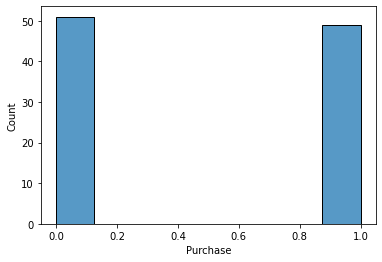

In [12]:
#import needed
import seaborn as sns

#Using previous data.csv, which we already checked for na, which had none, so no need to check again

#Check distribution to see if we need to oversample or not
sns.histplot(data=df['Purchase'], palette='bright')
plt.show()

#Very even distribution of purchase, so we will not have to use SMOTE to handle with oversampling

# Prepare Data For Classification

In [13]:
# label
y = df['Purchase'].to_numpy() #y as dependent variable
# data
X = df.drop('Purchase', axis = 1).to_numpy() #drop y from the independent variable list
X
#notice that values range greatly, from 0 to the hundreds, so we must scale the data

array([[ 84, 254,   0,   3,   2],
       [ 58, 247,   0,   6,   9],
       [ 56, 125,   1,   6,   8],
       [ 55,  22,   0,  11,   7],
       [ 95, 262,   0,   2,   3],
       [ 71, 113,   1,   8,   9],
       [ 76,  91,   1,   6,   3],
       [ 64,  46,   0,   6,  11],
       [ 56, 132,   0,   9,   9],
       [ 96, 190,   0,  11,   4],
       [ 56, 146,   0,   9,   7],
       [ 80, 226,   0,   4,   4],
       [ 72,  54,   1,   7,   9],
       [ 81, 104,   0,   2,   3],
       [ 72, 292,   0,   7,   3],
       [ 66, 126,   0,   8,   9],
       [ 89, 152,   1,   3,   5],
       [ 80, 221,   0,   3,   4],
       [ 66,  51,   0,   9,   9],
       [ 74, 230,   0,   6,   8],
       [ 74,  72,   1,   6,   8],
       [ 68, 284,   0,   6,  11],
       [ 96, 168,   0,   2,   4],
       [ 98, 194,   0,   1,   3],
       [ 86, 130,   1,  10,   1],
       [ 58, 227,   0,   9,   3],
       [ 75, 161,   1,   7,   8],
       [ 86, 262,   1,   2,   3],
       [ 65, 257,   1,   9,  11],
       [ 80,  

# Data Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler() #load in scale from sk standard scalar
scaled_X = scale.fit_transform(X) #scale x

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3) #train data with scaled x and y

# Import Classifiers and Metrics from Sklearn

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

#import logistic regression, svm, naive bayes, and random forest and then set up

lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# Train Model with training dataset

In [16]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Now that we have trained the ML model we can test the model with our testing dataset

In [17]:
#use test dataset for each form of categorization
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

# Model Evaluation with confusion matrix and ROC curve

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.89      1.00      0.94        16

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

              preci

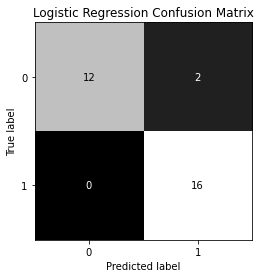

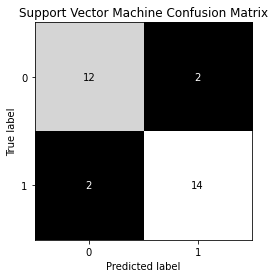

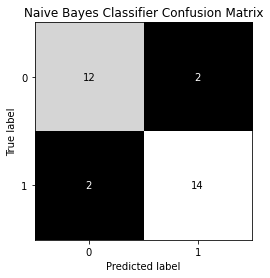

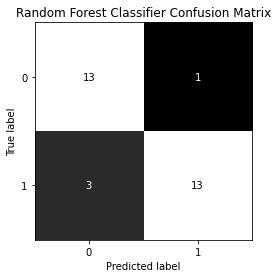

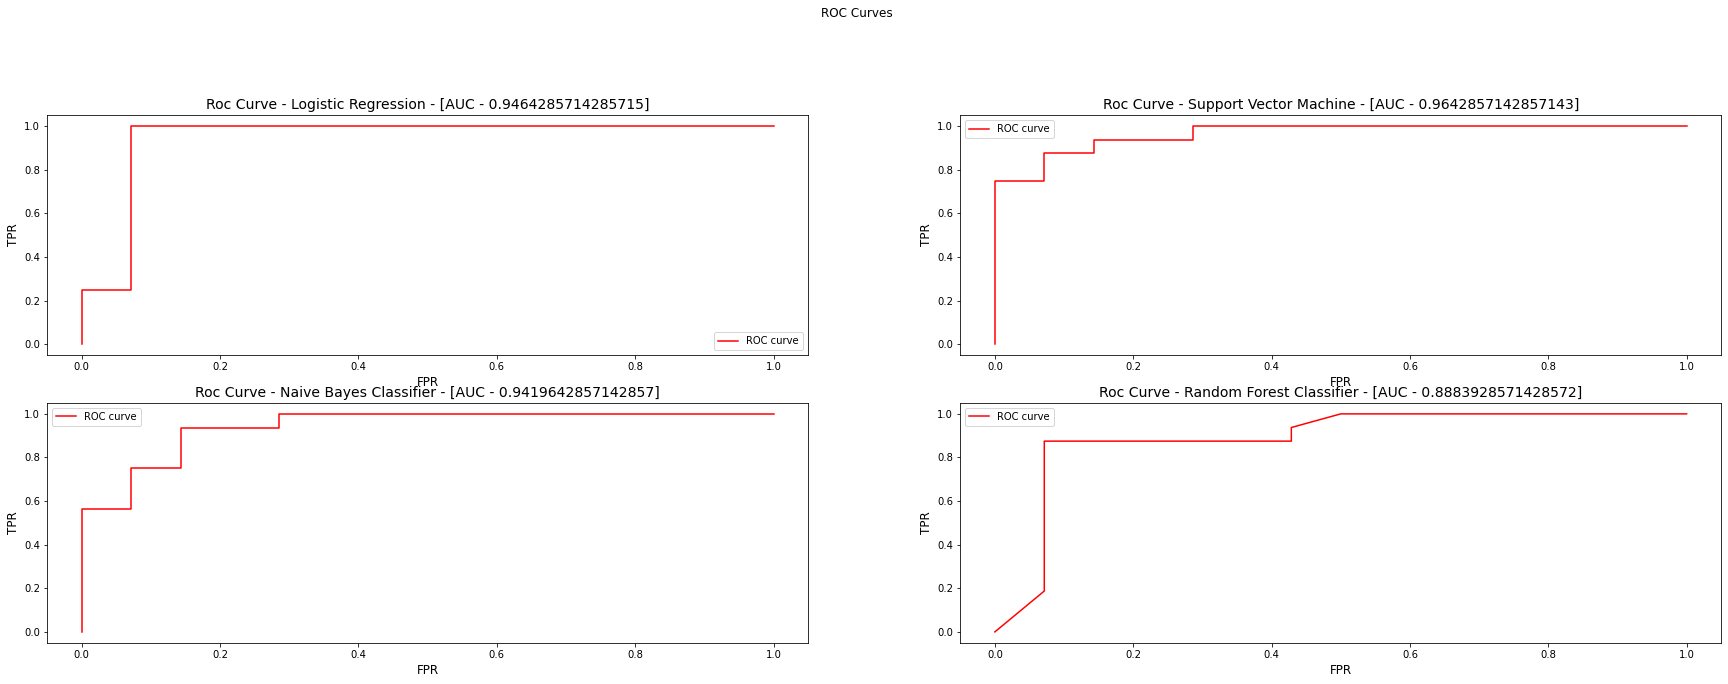

In [18]:
#model eval for interpretation

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()